### Plot faculty hiring distribution by city

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)
from postdocsalary.paths import save_fig, FIGURE_DIR

<ipython-input-2-57b724ca8b01>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
CBSA_df = pd.read_pickle(DATA_DIR / 'city_hiring.pickle')

In [4]:
CBSA_df[:3]

,CBSA_NAME,RPP_all,total_hires,prop_hires,n_uni,n_grad,prop_grad,cum_grad,cum_hires,hiring_grad_disparity
2,"Boston-Cambridge-Newton, MA-NH",115.5,1604.0,0.115679,10,2325.0,0.059061,0.059061,0.115679,1.958626
0,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,919.0,0.066277,6,1506.0,0.038256,0.097317,0.181956,1.732450
6,"New York-Newark-Jersey City, NY-NJ-PA",125.7,854.0,0.061589,5,1268.0,0.032211,0.129528,0.243545,1.912092


In [5]:
import seaborn as sns

In [6]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

### Top cities by RPP

In [7]:
nex = 10
top_n = len(CBSA_df)

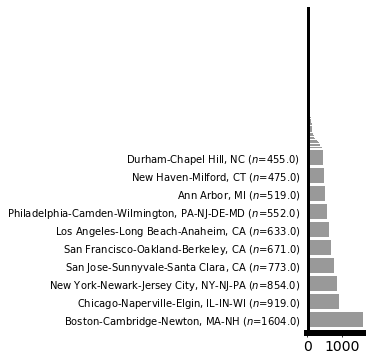

In [8]:
xlim = [0, 1600]

sort_mask = np.argsort(CBSA_df["total_hires"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(1, 6),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 1.3]},
)

ax = axs[0]
y = CBSA_df["total_hires"].values[sort_mask][nex:top_n]
ax.barh(
    np.arange(len(CBSA_df))[nex:top_n],
    y,
    color=[pal[8] if np.sign(i) > 0 else pal[8] for i in y],
)
ax.axvline(0, color='k', lw=6)

ax.set_xlim(xlim)
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = CBSA_df["total_hires"].values[sort_mask][:nex]
ax.barh(
    np.arange(len(CBSA_df))[:nex] + 1,
    y,
    color=[pal[8] if np.sign(i) > 0 else pal[8] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim(xlim)
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if True:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            CBSA_df["CBSA_NAME"].values[sort_mask][:nex],
            CBSA_df["total_hires"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
# ax.set_yticklabels(CBSA_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(6)
ax.xaxis.set_tick_params(labelsize=14)
#ax.set_xticks([-10000, -5000, 0, 5000, 10000])
#ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
ax.axvline(0, color='k', lw=6)
save_fig(FIGURE_DIR / 'city_hires')

### RPP

In [9]:
palpur = sns.color_palette('Purples', 10)
palpur

[(0.951449442522107, 0.9446981930026913, 0.969519415609381),
 (0.9007612456747405, 0.8963936947327951, 0.9434063821607074),
 (0.8355247981545559, 0.8361707035755478, 0.9118800461361014),
 (0.7469434832756633, 0.7505420991926183, 0.8675893886966551),
 (0.6620530565167244, 0.653440984236832, 0.8126105344098424),
 (0.5771626297577854, 0.5628911956939638, 0.7645059592464436),
 (0.4948558246828143, 0.47598615916955017, 0.7219838523644752),
 (0.4298961937716263, 0.3460668973471741, 0.6540715109573241),
 (0.36764321414840445, 0.22592848904267587, 0.5955401768550557),
 (0.30648212226066895, 0.11035755478662054, 0.5411303344867359)]

In [10]:
np.min(CBSA_df['RPP_all'])

83.2

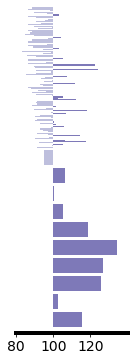

In [11]:
sort_mask = np.argsort(CBSA_df["total_hires"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(2, 6),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 1.3]},
)

ax = axs[0]
y = CBSA_df["RPP_all"].values[sort_mask][nex:top_n] - 100
ax.barh(
    np.arange(len(CBSA_df))[nex:top_n],
    y,
    color=[palpur[6] if np.sign(i) > 0 else palpur[3] for i in y],
)
ax.set_xlim([-20, 40])
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])
#ax.axvline(0, color='k', lw=3)

ax = axs[1]
y = CBSA_df["RPP_all"].values[sort_mask][:nex] - 100
ax.barh(
    np.arange(len(CBSA_df))[:nex] + 1,
    y,
    color=[palpur[6] if np.sign(i) > 0 else palpur[3] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim([-20, 40])
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if False:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            CBSA_df["CBSA_NAME"].values[sort_mask][:nex],
            CBSA_df["total_hires"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
# ax.set_yticklabels(CBSA_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_xticks([-20, 0, 20])
#ax.axvline(0, color='k', lw=3)
ax.set_xticklabels(['80', '100', '120'])
save_fig(FIGURE_DIR / 'city_RPP')

### Top cities by hires

In [12]:
palblue = sns.color_palette('Blues', 10)
palblue

[(0.8978854286812764, 0.939038831218762, 0.977362552864283),
 (0.828881199538639, 0.8937639369473279, 0.954725105728566),
 (0.7506343713956171, 0.8478431372549019, 0.9282122260668974),
 (0.6325259515570935, 0.7976470588235294, 0.8868742791234141),
 (0.491764705882353, 0.7219684736639754, 0.8547789311803152),
 (0.36159938485198, 0.6427374086889658, 0.8165782391387928),
 (0.24816608996539793, 0.5618915801614763, 0.7709803921568628),
 (0.15072664359861593, 0.4644521337946943, 0.7207843137254902),
 (0.07481737793156479, 0.3732564398308343, 0.6552095347943099),
 (0.03137254901960784, 0.28161476355247983, 0.5582622068435218)]

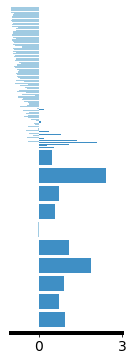

In [13]:
xlim = [-1, 3]
metric = "hiring_grad_disparity"
sort_mask = np.argsort(CBSA_df["total_hires"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(2, 6),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 1.3]},
)

ax = axs[0]
#ax.axvline(0, color='k', lw=3)

y = CBSA_df[metric].values[sort_mask][nex:top_n]-1
ax.barh(
    np.arange(len(CBSA_df))[nex:top_n],
    y,
    color=[palblue[6] if np.sign(i) > 0 else palblue[3] for i in y],
)
ax.set_xlim(xlim)
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = CBSA_df[metric].values[sort_mask][:nex] -1
ax.barh(
    np.arange(len(CBSA_df))[:nex] + 1,
    y,
    color=[palblue[6] if np.sign(i) > 0 else palblue[3] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim(xlim)
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if False:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            CBSA_df["CBSA_NAME"].values[sort_mask][:nex],
            CBSA_df["total_hires"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])

    
# ax.set_yticklabels(CBSA_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
#ax.set_xticks([-10000, -5000, 0, 5000, 10000])
#ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
#ax.axvline(0, color='k', lw=3)
ax.set_xticks([0,3])
save_fig(FIGURE_DIR / 'city_hiring_disparity')

In [14]:
CBSA_df[:10]

,CBSA_NAME,RPP_all,total_hires,prop_hires,n_uni,n_grad,prop_grad,cum_grad,cum_hires,hiring_grad_disparity
2,"Boston-Cambridge-Newton, MA-NH",115.5,1604.0,0.115679,10,2325.0,0.059061,0.059061,0.115679,1.958626
0,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,919.0,0.066277,6,1506.0,0.038256,0.097317,0.181956,1.732450
6,"New York-Newark-Jersey City, NY-NJ-PA",125.7,854.0,0.061589,5,1268.0,0.032211,0.129528,0.243545,1.912092
5,"San Jose-Sunnyvale-Santa Clara, CA",126.7,773.0,0.055748,1,763.0,0.019382,0.148910,0.299293,2.876240
8,"San Francisco-Oakland-Berkeley, CA",134.5,671.0,0.048392,1,911.0,0.023142,0.172052,0.347685,2.091097
16,"Los Angeles-Long Beach-Anaheim, CA",118.8,633.0,0.045651,4,1859.0,0.047223,0.219276,0.393336,0.966706
3,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",105.3,552.0,0.039810,4,990.0,0.025149,0.244424,0.433146,1.582975
11,"Ann Arbor, MI",100.6,519.0,0.037430,1,853.0,0.021668,0.266093,0.470576,1.727382
1,"New Haven-Milford, CT",106.2,475.0,0.034256,1,393.0,0.009983,0.276076,0.504832,3.431398
14,"Durham-Chapel Hill, NC",94.8,455.0,0.032814,2,866.0,0.021999,0.298074,0.537646,1.491639


In [15]:
0.048392 / 0.004039

11.981183461252785